In [2]:
# import stuff
import os,sys
import glob
import pandas
from osgeo import gdal
import datetime 
from datetime import datetime
from datetime import timedelta
from dateutil import parser
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from scipy import signal
%matplotlib  widget 

In [3]:
data = np.zeros((100,100))
data[50,50] = 1.0

alooks = 8      # stdrg
rlooks = 40     # stdaz

kernlenrg = 8*alooks+1
kernlenaz = 8*rlooks+1
kernrg = signal.gaussian(kernlenrg, std=alooks) 
kernaz = signal.gaussian(kernlenaz, std=rlooks) 
wind = np.outer(kernrg,kernaz)
wind = wind/np.sum(wind)
data_filt = signal.convolve2d(data, wind, mode='same')

data_filt2 = gaussian_filter(data,sigma=[alooks,rlooks])

/tmp/ipykernel_23130/1886606736.py:9: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  kernrg = signal.gaussian(kernlenrg, std=alooks)
/tmp/ipykernel_23130/1886606736.py:10: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  kernaz = signal.gaussian(kernlenaz, std=rlooks)


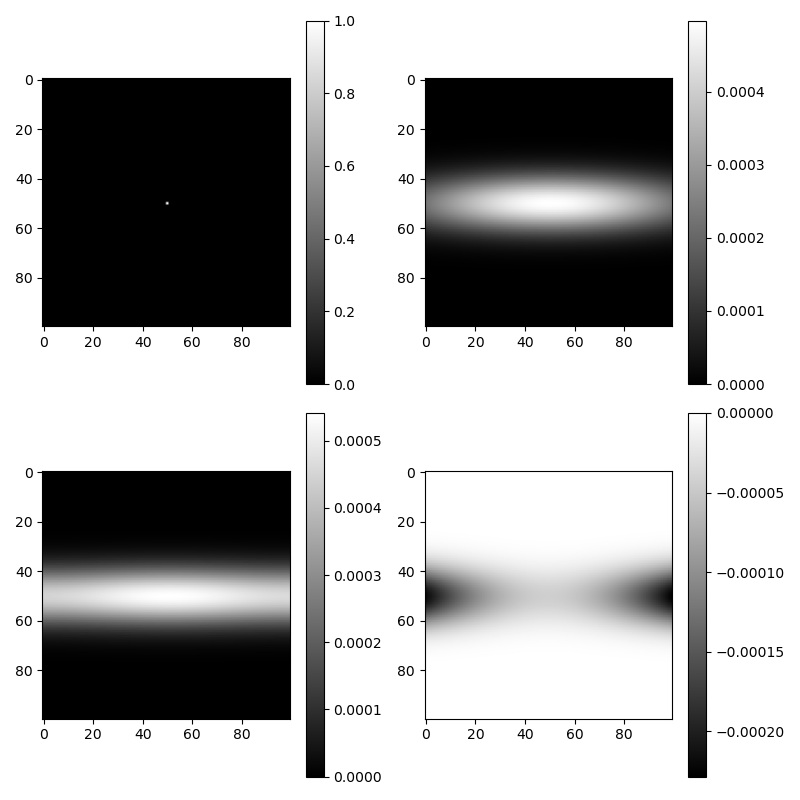

In [4]:
plt.figure(figsize=(8,8),tight_layout=True)
plt.subplot(2,2,1)
plt.imshow(data,cmap='gray')
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(data_filt,cmap='gray')
plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(data_filt2,cmap='gray')
plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(data_filt-data_filt2,cmap='gray')
plt.colorbar()
plt.show()